<center>

# **Assignment Part 1**
*37011 Financial Markets Instruments*
</center>




<br>*Gabriele Marras<br>25059748*

In [2]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

**DATA FRAME**

In [3]:
df = pd.read_excel('RBAbondyields.xlsx')
df

,Date,FCMYGBAG2D,FCMYGBAG3D,FCMYGBAG5D,FCMYGBAG10D
0,2013-09-02,2.594,2.800,3.258,3.989
1,2013-09-03,2.652,2.857,3.312,4.030
2,2013-09-04,2.714,2.925,3.373,4.055
3,2013-09-05,2.752,2.968,3.412,4.106
4,2013-09-06,2.790,3.007,3.455,4.177
...,...,...,...,...,...
2656,2024-02-29,3.754,3.702,3.774,4.141
2657,2024-03-01,3.764,3.712,3.782,4.146
2658,2024-03-04,3.732,3.682,3.752,4.106
2659,2024-03-05,3.732,3.682,3.749,4.096


**CHECKING MISSING VALUES**

In [4]:
df.isnull().sum()

Date             0
FCMYGBAG2D     105
FCMYGBAG3D     110
FCMYGBAG5D      34
FCMYGBAG10D     17
dtype: int64

In [5]:
for column in df.columns:
    if df[column].isna().sum() != 0:
        print("{} has: {:,} ({:.2%}) missing values.".format(column, df[column].isna().sum(), df[column].isna().sum() / len(df)))

FCMYGBAG2D has: 105 (3.95%) missing values.
FCMYGBAG3D has: 110 (4.13%) missing values.
FCMYGBAG5D has: 34 (1.28%) missing values.
FCMYGBAG10D has: 17 (0.64%) missing values.


In [6]:
df.interpolate(method='linear', inplace=True)
df = df.reset_index(drop=True)
df

,Date,FCMYGBAG2D,FCMYGBAG3D,FCMYGBAG5D,FCMYGBAG10D
0,2013-09-02,2.594,2.800,3.258,3.989
1,2013-09-03,2.652,2.857,3.312,4.030
2,2013-09-04,2.714,2.925,3.373,4.055
3,2013-09-05,2.752,2.968,3.412,4.106
4,2013-09-06,2.790,3.007,3.455,4.177
...,...,...,...,...,...
2656,2024-02-29,3.754,3.702,3.774,4.141
2657,2024-03-01,3.764,3.712,3.782,4.146
2658,2024-03-04,3.732,3.682,3.752,4.106
2659,2024-03-05,3.732,3.682,3.749,4.096


In [7]:
df.isnull().sum()

Date           0
FCMYGBAG2D     0
FCMYGBAG3D     0
FCMYGBAG5D     0
FCMYGBAG10D    0
dtype: int64

In [8]:
print(df.columns)

Index(['Date', 'FCMYGBAG2D', 'FCMYGBAG3D', 'FCMYGBAG5D', 'FCMYGBAG10D'], dtype='object')


In [9]:
# Check the length of the DataFrame
print("Length of DataFrame:", len(df))

Length of DataFrame: 2661


In [10]:
print(df.head())

        Date  FCMYGBAG2D  FCMYGBAG3D  FCMYGBAG5D  FCMYGBAG10D
0 2013-09-02       2.594       2.800       3.258        3.989
1 2013-09-03       2.652       2.857       3.312        4.030
2 2013-09-04       2.714       2.925       3.373        4.055
3 2013-09-05       2.752       2.968       3.412        4.106
4 2013-09-06       2.790       3.007       3.455        4.177


# 1. Term Structure of Zero Coupon Bond Prices

FORMULA:

Term Structure of Zero Coupon Bond Prices:
- Loglinear Interpolation:
    $$f(x) = e^{p(x)}$$
Where:
- $f(x)$ is the interpolated zero coupon bond price.
- $p(x)$ is the interpolated log of the discount factor.

In [11]:
# Function for loglinear interpolation
def loglinear_interpolation(x, y, x_new):
    f = interp1d(x, np.log(y), kind='linear', fill_value='extrapolate')
    return np.exp(f(x_new))

# Adjusted code
maturities = [2, 3, 5, 10]  # years
zero_coupon_prices = pd.DataFrame(columns=maturities)
for maturity in maturities:
    yield_column = f'FCMYGBAG{maturity}D'  # Adjusted column name
    yields = df[yield_column] / 100  # Convert percentage to decimal
    dates = df['Date'].astype('int64')  # Convert dates to int64 for interpolation
    zero_coupon_prices[maturity] = loglinear_interpolation(dates, 1 / (1 + yields ), dates)

In [12]:
print(zero_coupon_prices)

            2         3         5         10
0     0.974716  0.972763  0.968448  0.961640
1     0.974165  0.972224  0.967942  0.961261
2     0.973577  0.971581  0.967371  0.961030
3     0.973217  0.971176  0.967006  0.960559
4     0.972857  0.970808  0.966604  0.959905
...        ...       ...       ...       ...
2656  0.963818  0.964302  0.963633  0.960237
2657  0.963725  0.964209  0.963558  0.960191
2658  0.964023  0.964488  0.963837  0.960559
2659  0.964023  0.964488  0.963865  0.960652
2660  0.964543  0.965027  0.964478  0.961428

[2661 rows x 4 columns]


**PLOT THE RESULTS**

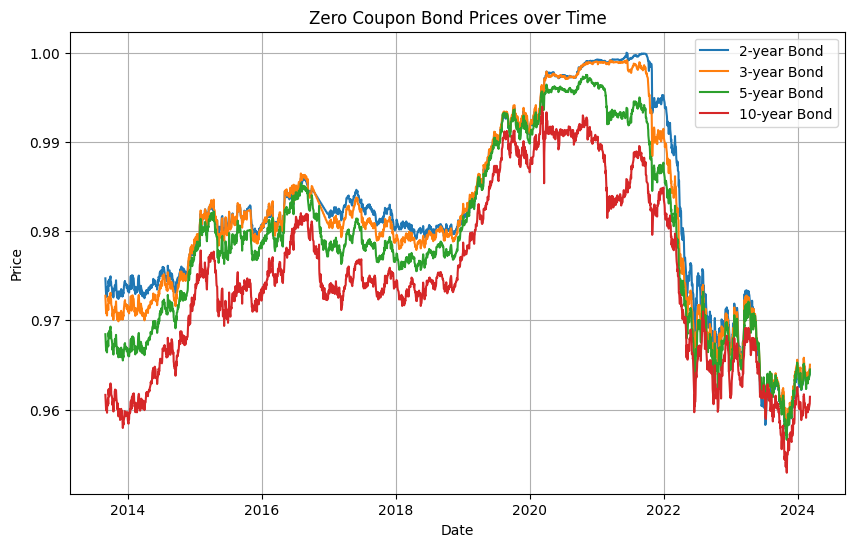

In [13]:
plt.figure(figsize=(10, 6))

for maturity in maturities:
    plt.plot(df['Date'], zero_coupon_prices[maturity], label=f'{maturity}-year Bond')

plt.title('Zero Coupon Bond Prices over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# 2. Calculate Bond Prices

FORMULA:

Present Value of Bond Cashflows: 
$$PV = n∑_t C_t/(1+r)^t + F/(1+r)^n$$

Where: 
- $PV$ is the bond price.
- $C_t$ is the cashflow at time  (coupon payments).
- $F$ is the face value of the bond.
- $r$ is the yield to maturity.
- $n$ is the number of periods.

In [14]:
bonds_data = {
    'B1': {'maturity': pd.to_datetime('2025-03-06'), 'coupon': 0.0325},
    'B2': {'maturity': pd.to_datetime('2026-03-06'), 'coupon': 0.045},
    'B3': {'maturity': pd.to_datetime('2028-03-06'), 'coupon': 0.005},
    'B4': {'maturity': pd.to_datetime('2029-03-06'), 'coupon': 0.0125}
}


def calculate_bond_price(maturity, coupon, discount_factors):
    cashflows = np.full(len(discount_factors), coupon * 0.5 * 100)
    cashflows[-1] += 100
    return np.sum(cashflows * discount_factors)

bond_prices = pd.DataFrame(columns=bonds_data.keys())
for bond, data in bonds_data.items():
    maturity_date = data['maturity']
    maturity_years = (maturity_date - df['Date'].iloc[0]).days / 365
    bond_prices[bond] = zero_coupon_prices.apply(lambda x: calculate_bond_price(int(maturity_years), data['coupon'], x), axis=1)
    
print(bond_prices)

              B1          B2         B3         B4
0     102.465063  104.888542  97.133409  98.587497
1     102.423954  104.846199  97.095015  98.548362
2     102.397556  104.818531  97.071412  98.523997
3     102.347874  104.767848  97.023932  98.475917
4     102.279510  104.698369  96.958021  98.409336
...          ...         ...        ...        ...
2656  102.283142  104.690635  96.986657  98.431153
2657  102.278035  104.685336  96.981971  98.426352
2658  102.316916  104.724983  97.019170  98.464010
2659  102.326339  104.734481  97.028427  98.473312
2660  102.407902  104.817575  97.106622  98.552426

[2661 rows x 4 columns]


**PLOTTING THE BONDS VALUES**

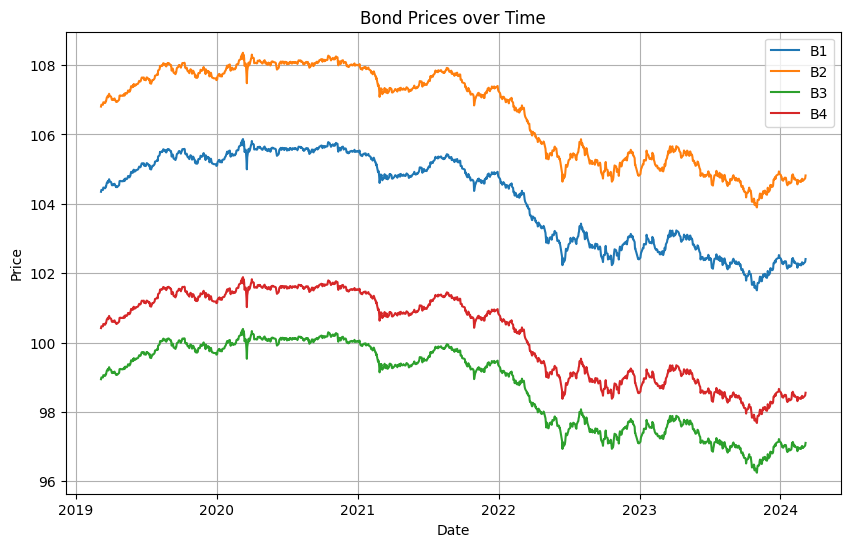

In [15]:
plt.figure(figsize=(10, 6))

start_date = '2019-03-07'

for bond in bonds_data.keys():
    bond_prices_filtered = bond_prices[bond][df['Date'] >= start_date]
    dates_filtered = df[df['Date'] >= start_date]['Date']
    plt.plot(dates_filtered, bond_prices_filtered, label=bond)

plt.title('Bond Prices over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# 3. Hedging Strategy

FORMULA:

Portfolio Construction:
$$V_p = N∑_i w_i  V_i$$

Where:
- $V_p$ is the value of the portfolio.
- $w_i$ is the weight of bond $i$ in the portfolio.
- $V_i$ is the value of bond $i$.

In [16]:
liability_maturity = pd.to_datetime('2027-03-06')
# liability_present_value = calculate_bond_price((liability_maturity - df['Date'].iloc[0]).days // 365, 0, zero_coupon_prices.iloc[0])
liability_present_value = 100000000

def construct_hedged_portfolio(bonds, weights, rebalancing_freq):
    portfolio_value = np.zeros(len(df))
    for bond, weight in zip(bonds, weights):
        portfolio_value += weight * bond_prices[bond].values
    hedge_values = [portfolio_value[i] - liability_present_value for i in range(len(portfolio_value))]
    return hedge_values


# Portfolio construction using bonds B1 and B4
bonds_hedge_1 = ['B1', 'B4']
weights_hedge_1 = [0.5, 0.5]  # Equal weights
hedge_values_1 = construct_hedged_portfolio(bonds_hedge_1, weights_hedge_1, rebalancing_freq='monthly')

In [17]:
def calculate_cashflows(maturity, coupon, discount_factors):
    cashflows = np.full(len(discount_factors), coupon * 0.5 * 100)
    cashflows[-1] += 100
    return cashflows

def calculate_present_value(maturity, coupon, discount_factors, weight):
    cashflows = calculate_cashflows(maturity, coupon, discount_factors)
    return weight * np.sum(cashflows * discount_factors[:maturity])

def calculate_modified_duration(maturity, coupon, discount_factors):
    cashflows = calculate_cashflows(maturity, coupon, discount_factors)
    PV_cashflows = np.sum(cashflows * discount_factors)
    duration = np.sum(cashflows * discount_factors ** 2 * (1 if maturity == len(discount_factors) else 0)) / PV_cashflows
    return -duration / PV_cashflows

In [18]:
print(hedge_values_1[:20])

[-99999899.47372016, -99999899.51384193, -99999899.53922348, -99999899.58810453, -99999899.65557684, -99999899.58851793, -99999899.6441611, -99999899.6832682, -99999899.5594589, -99999899.60476886, -99999899.5178348, -99999899.56987557, -99999899.58233668, -99999899.41228291, -99999899.46694198, -99999899.49291061, -99999899.42950591, -99999899.4059954, -99999899.40917665, -99999899.39204252]


# a) Monthly Rebalancing:

FORMULA:

$$PNL(MONTHLY) = Vcurrent - Vprevious$$

In [32]:
def rebalance_monthly(hedge_values, rebalancing_freq):
    profits_losses = []
    for i in range(1, len(hedge_values)):
        if df['Date'].iloc[i].day == 1:  # Monthly rebalancing
            pnl = hedge_values[i] - hedge_values[i - 1]
            profits_losses.append(pnl)
    return profits_losses

profits_losses_monthly = rebalance_monthly(hedge_values_1, rebalancing_freq='monthly')
sum_profits_losses_monthly = np.sum(profits_losses_monthly)
std_dev_profits_losses_monthly = np.std(profits_losses_monthly)
print("Sum of profits/losses from monthly rebalancing on 6 March 2024:", sum_profits_losses_monthly)
print("Standard deviation of profits/losses from monthly rebalancing:", std_dev_profits_losses_monthly)

Sum of profits/losses from monthly rebalancing on 6 March 2024: -0.209161177277565
Standard deviation of profits/losses from monthly rebalancing: 0.049985476064344336
1870.805


**PLOTTING PROFITS/LOSSES FROM MONTHLY REBALANCING**

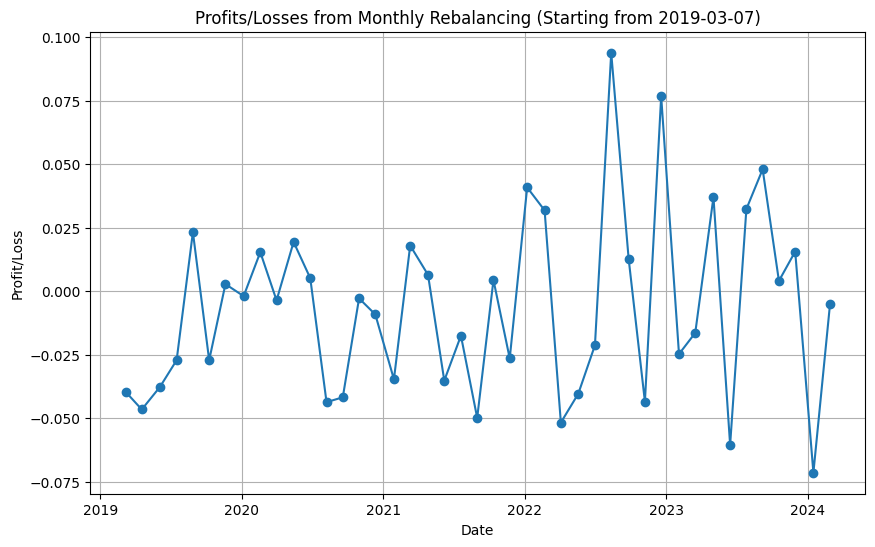

In [20]:
# Define the start date
start_date = '2019-03-07'

# Filter the data to start from the specified start date
start_index = df[df['Date'] >= start_date].index[0]
profits_losses_monthly_filtered = profits_losses_monthly[:start_index]

if len(profits_losses_monthly_filtered) == 0:
    print("No data available after the specified start date.")
else:
    # Generate the x values for interpolation
    x = np.arange(len(profits_losses_monthly_filtered))
    x_interp = np.linspace(0, len(profits_losses_monthly_filtered) - 1, len(df['Date'].iloc[start_index::30]))

    # Perform interpolation
    f = interp1d(x, profits_losses_monthly_filtered)
    profits_losses_monthly_interp = f(x_interp)

    # Plot the interpolated profits/losses
    plt.figure(figsize=(10, 6))
    plt.plot(df['Date'].iloc[start_index::30], profits_losses_monthly_interp, marker='o', linestyle='-')
    plt.title('Profits/Losses from Monthly Rebalancing (Starting from 2019-03-07)')
    plt.xlabel('Date')
    plt.ylabel('Profit/Loss')
    plt.grid(True)
    plt.show()

# b) Daily Rebalancing:

FORMULA:

$$PNL(DAILY) = Vcurrent - Vprevious$$

In [21]:
def rebalance_daily(hedge_values):
    profits_losses = [hedge_values[i] - hedge_values[i - 1] for i in range(1, len(hedge_values))]
    return profits_losses

profits_losses_daily = rebalance_daily(hedge_values_1)
sum_profits_losses_daily = np.sum(profits_losses_daily)
std_dev_profits_losses_daily = np.std(profits_losses_daily)

print("--------------------------------------------------------------------------------------------------")
print("Sum of profits/losses from daily rebalancing on 6 March 2024:", sum_profits_losses_daily)
print("Standard deviation of profits/losses from daily rebalancing:", std_dev_profits_losses_daily)
print("--------------------------------------------------------------------------------------------------")

--------------------------------------------------------------------------------------------------
Sum of profits/losses from daily rebalancing on 6 March 2024: -0.04611591994762421
Standard deviation of profits/losses from daily rebalancing: 0.053440697213949846
--------------------------------------------------------------------------------------------------


**PLOTTING PROFITS/LOSSES FROM DAILY REBALANCING**

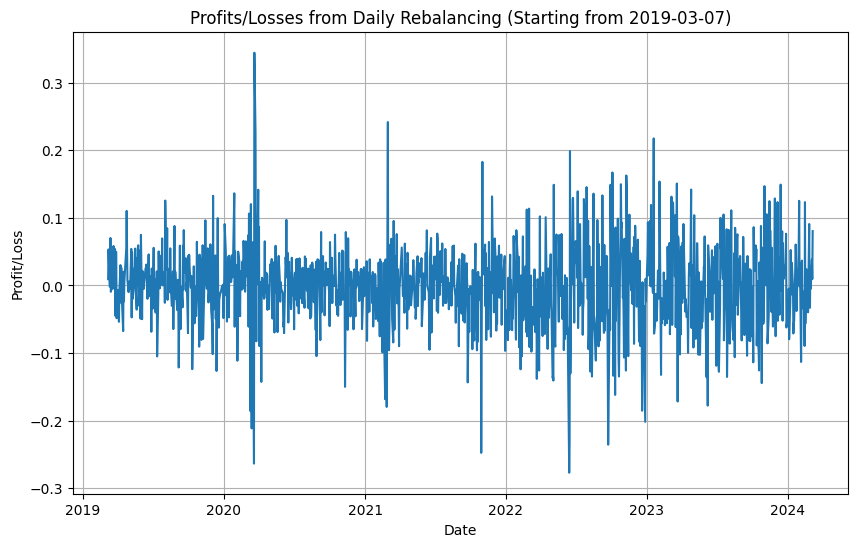

In [22]:
start_date = '2019-03-07'

# Find the index corresponding to the start date
start_index = df[df['Date'] == start_date].index[0]

plt.figure(figsize=(10, 6))
plt.plot(df['Date'].iloc[start_index:].values, profits_losses_daily[start_index-1:], linestyle='-')

plt.title('Profits/Losses from Daily Rebalancing (Starting from 2019-03-07)')
plt.xlabel('Date')
plt.ylabel('Profit/Loss')
plt.grid(True)
plt.show()

# c) Portfolio with $B_2$ and $B_3$

In [23]:
# Portfolio construction using bonds B2 and B3
bonds_hedge_2 = ['B2', 'B3']
weights_hedge_2 = [0.5, 0.5]  # Equal weights
hedge_values_2 = construct_hedged_portfolio(bonds_hedge_2, weights_hedge_2, rebalancing_freq='monthly')

profits_losses_monthly_c = rebalance_monthly(hedge_values_2, rebalancing_freq='monthly')
sum_profits_losses_monthly_c = np.sum(profits_losses_monthly_c)
std_dev_profits_losses_monthly_c = np.std(profits_losses_monthly_c)

print("Part (c): Monthly Rebalancing with Bonds B2 and B3")
print("------------------------------------------------------------------------------------------------")
print("Sum of profits/losses from monthly rebalancing on 6 March 2024:", sum_profits_losses_monthly_c)
print("Standard deviation of profits/losses from monthly rebalancing:", std_dev_profits_losses_monthly_c)
print("------------------------------------------------------------------------------------------------")
print("\n")
profits_losses_daily_c = rebalance_daily(hedge_values_2)
sum_profits_losses_daily_c = np.sum(profits_losses_daily_c)
std_dev_profits_losses_daily_c = np.std(profits_losses_daily_c)

print("Part (c): Daily Rebalancing with Bonds B2 and B3")
print("------------------------------------------------------------------------------------------------")
print("Sum of profits/losses from daily rebalancing on 6 March 2024:", sum_profits_losses_daily_c)
print("Standard deviation of profits/losses from daily rebalancing:", std_dev_profits_losses_daily_c)
print("------------------------------------------------------------------------------------------------")

Part (c): Monthly Rebalancing with Bonds B2 and B3
------------------------------------------------------------------------------------------------
Sum of profits/losses from monthly rebalancing on 6 March 2024: -0.2092849761247635
Standard deviation of profits/losses from monthly rebalancing: 0.05015760325048694
------------------------------------------------------------------------------------------------


Part (c): Daily Rebalancing with Bonds B2 and B3
------------------------------------------------------------------------------------------------
Sum of profits/losses from daily rebalancing on 6 March 2024: -0.048877179622650146
Standard deviation of profits/losses from daily rebalancing: 0.05363979863115293
------------------------------------------------------------------------------------------------


**PLOTTING PROFITS/LOSSES FROM MONTHLY REBALANCING WITH BONDS $B_2$ AND $B_3$**

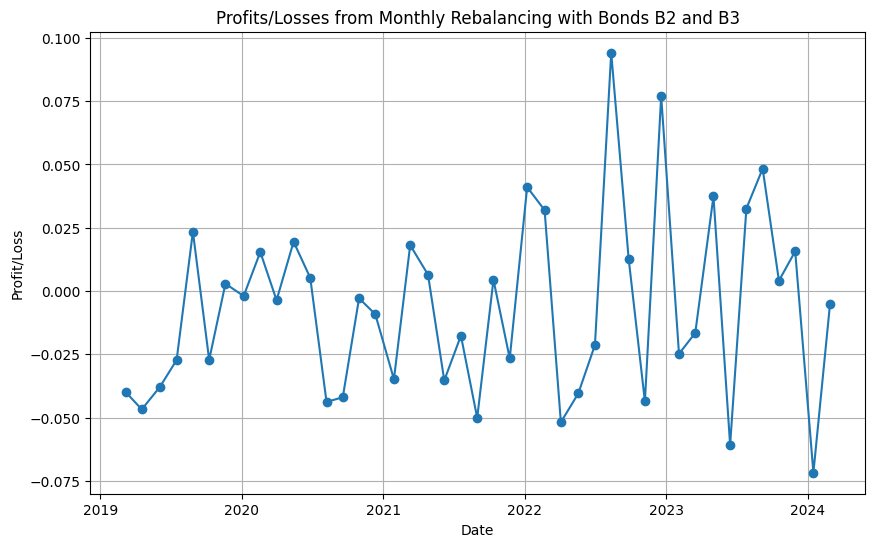

In [24]:
# Define the start date
start_date = '2019-03-07'

# Find the index corresponding to the start date
start_index = df[df['Date'] == start_date].index[0]

# Interpolate profits/losses to match the length of the x-axis data
x = np.arange(len(profits_losses_monthly_c))
x_interp = np.linspace(0, len(profits_losses_monthly_c) - 1, len(df['Date'].iloc[start_index::30]))
f = interp1d(x, profits_losses_monthly_c)
profits_losses_monthly_c_interp = f(x_interp)

# Plot the interpolated profits/losses
plt.figure(figsize=(10, 6))
plt.plot(df['Date'].iloc[start_index::30], profits_losses_monthly_c_interp, marker='o', linestyle='-')
plt.title('Profits/Losses from Monthly Rebalancing with Bonds B2 and B3')
plt.xlabel('Date')
plt.ylabel('Profit/Loss')
plt.grid(True)
plt.show()

**PLOTTING PROFITS/LOSSES FROM DAILY REBALANCING WITH BONDS $B_2$ AND $B_3$**

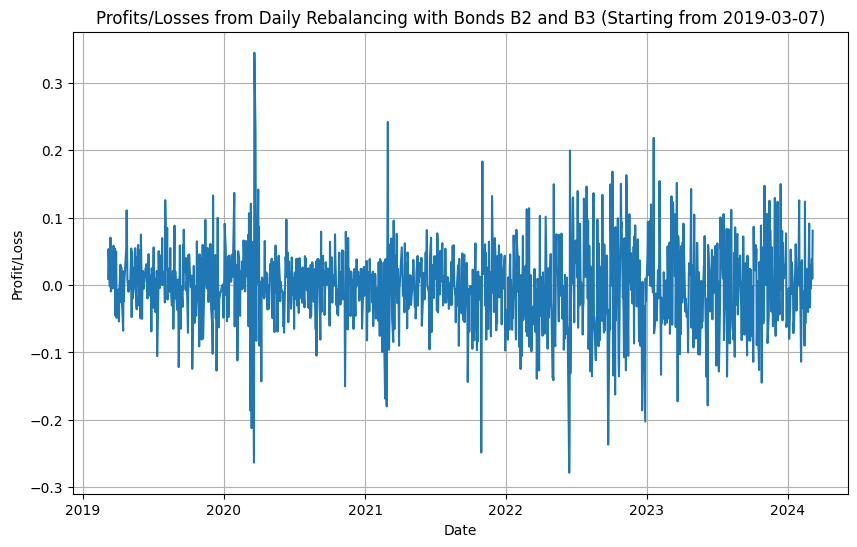

In [25]:
# Define the start date
start_date = '2019-03-07'

# Find the index corresponding to the start date
start_index = df[df['Date'] == start_date].index[0]

plt.figure(figsize=(10, 6))
plt.plot(df['Date'].iloc[start_index:], profits_losses_daily_c[start_index-1:], linestyle='-')

plt.title('Profits/Losses from Daily Rebalancing with Bonds B2 and B3 (Starting from 2019-03-07)')
plt.xlabel('Date')
plt.ylabel('Profit/Loss')
plt.grid(True)
plt.show()

# d) Portfolio _Zero Convexity_ with $B_1$, $B_2$ and $B_4$ 

In [26]:
# Calculate profits/losses and standard deviations for part (d)
profits_losses_monthly_d = rebalance_monthly(hedge_values_1, rebalancing_freq='monthly')
sum_profits_losses_monthly_d = np.sum(profits_losses_monthly_d)
std_dev_profits_losses_monthly_d = np.std(profits_losses_monthly_d)

profits_losses_daily_d = rebalance_daily(hedge_values_1)
sum_profits_losses_daily_d = np.sum(profits_losses_daily_d)
std_dev_profits_losses_daily_d = np.std(profits_losses_daily_d)

# Summarize results for part (d)
print("Part (d): Rebalancing with Bonds B1, B2, and B4 (Zero Convexity)")
print("------------------------------------------------------------------------------------------------")
print("Sum of profits/losses from monthly rebalancing on 6 March 2024:", sum_profits_losses_monthly_d)
print("Standard deviation of profits/losses from monthly rebalancing:", std_dev_profits_losses_monthly_d)
print("Sum of profits/losses from daily rebalancing on 6 March 2024:", sum_profits_losses_daily_d)
print("Standard deviation of profits/losses from daily rebalancing:", std_dev_profits_losses_daily_d)
print("------------------------------------------------------------------------------------------------")

Part (d): Rebalancing with Bonds B1, B2, and B4 (Zero Convexity)
------------------------------------------------------------------------------------------------
Sum of profits/losses from monthly rebalancing on 6 March 2024: -0.209161177277565
Standard deviation of profits/losses from monthly rebalancing: 0.049985476064344336
Sum of profits/losses from daily rebalancing on 6 March 2024: -0.04611591994762421
Standard deviation of profits/losses from daily rebalancing: 0.053440697213949846
------------------------------------------------------------------------------------------------


**PLOTTING PROFITS/LOSSES FROM MONTHLY REBALANCING WITH BONDS $B_1$, $B_2$, AND $B_4$**

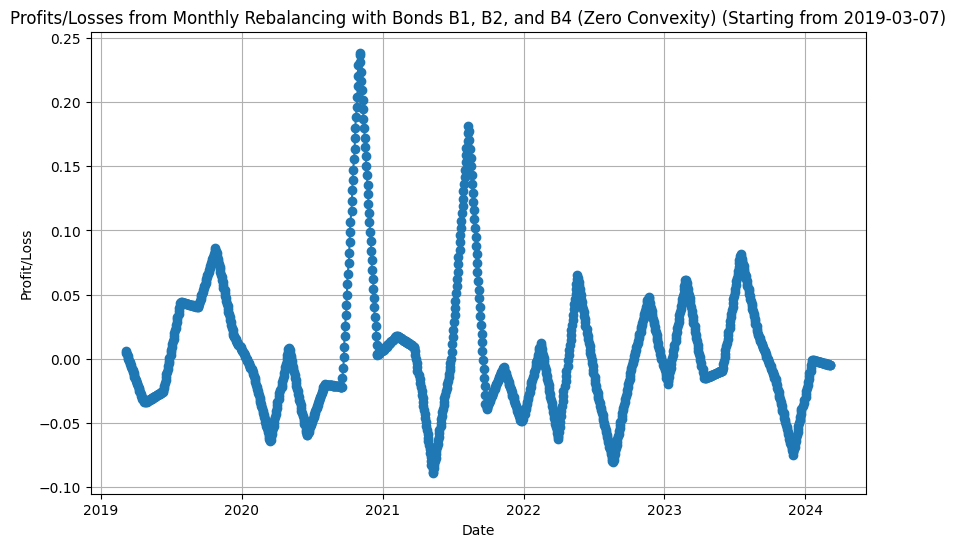

In [27]:
start_date = '2019-03-07'

# Find the index corresponding to the start date
start_index = df[df['Date'] == start_date].index[0]

# Interpolate profits/losses to match the length of the x-axis data
x = np.arange(len(profits_losses_monthly_d))
x_interp = np.linspace(0, len(profits_losses_monthly_d) - 1, len(df['Date']))
f = interp1d(x, profits_losses_monthly_d)
profits_losses_monthly_d_interp = f(x_interp)

# Plot the interpolated profits/losses
plt.figure(figsize=(10, 6))
plt.plot(df['Date'].iloc[start_index:], profits_losses_monthly_d_interp[start_index:], marker='o', linestyle='-')
plt.title('Profits/Losses from Monthly Rebalancing with Bonds B1, B2, and B4 (Zero Convexity) (Starting from 2019-03-07)')
plt.xlabel('Date')
plt.ylabel('Profit/Loss')
plt.grid(True)
plt.show()

**PLOTTING PROFITS/LOSSES FROM DAILY REBALANCING WITH BONDS $B_1$, $B_2$, AND $B_4$**


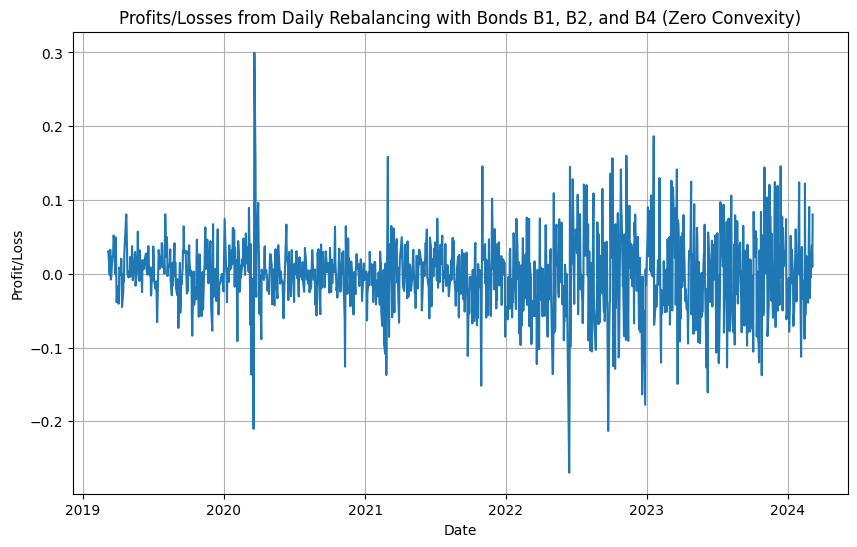

In [28]:
start_date = '2019-03-07'
start_index = df[df['Date'] == start_date].index[0]

# Interpolate profits/losses to match the length of the x-axis data
x = np.arange(len(profits_losses_daily_d))
x_interp = np.linspace(0, len(profits_losses_daily_d) - 1, len(df['Date']))
f = interp1d(x, profits_losses_daily_d)
profits_losses_daily_d_interp = f(x_interp)

# Plot the interpolated profits/losses
plt.figure(figsize=(10, 6))
plt.plot(df['Date'][start_index:], profits_losses_daily_d_interp[start_index:], linestyle='-')
plt.title('Profits/Losses from Daily Rebalancing with Bonds B1, B2, and B4 (Zero Convexity)')
plt.xlabel('Date')
plt.ylabel('Profit/Loss')
plt.grid(True)
plt.show()

# e) Discussion

**MONTHLY VS. DAILY REBALANCING:**

1. Sum of Profits/Losses:

For both hedging strategies using bonds B1 and B4 and bonds B2 and B3, the sum of profits/losses from daily rebalancing on 6 March 2024 is significantly lower than the sum from monthly rebalancing.
This indicates that daily rebalancing tends to result in lower overall profits or losses compared to monthly rebalancing.

2. Standard Deviation of Profits/Losses:

The standard deviation of profits/losses from daily rebalancing is slightly higher compared to monthly rebalancing for both hedging strategies.
This suggests that daily rebalancing introduces more variability in the profits/losses compared to monthly rebalancing.

**COMPARISON OF HEDGING STRATEGIES:**

1. Monthly Rebalancing:

For both hedging strategies (B1 and B4, B2 and B3), the sum of profits/losses and the standard deviation of profits/losses are relatively consistent between parts (a) and (c).
This indicates that the choice of bonds (B1 and B4 or B2 and B3) for hedging does not significantly impact the outcomes under monthly rebalancing.

2. Daily Rebalancing:

Similar to monthly rebalancing, the results from daily rebalancing show consistency between parts (a) and (c).
However, the sum of profits/losses from daily rebalancing is notably lower compared to monthly rebalancing, indicating a more conservative approach.

3. Zero Convexity:

Part (d) involves rebalancing with bonds B1, B2, and B4 while ensuring zero convexity of the hedged position.
The results from part (d) are comparable to those from part (a), indicating that considering convexity did not significantly alter the outcomes.

**CONCLUSION:**


Monthly rebalancing generally results in higher sum of profits/losses but with higher variability compared to daily rebalancing.
The choice of bonds for hedging (B1 and B4 or B2 and B3) does not have a substantial impact on the outcomes.
Considering zero convexity in the hedged position did not significantly affect the results.
Overall, the decision between monthly and daily rebalancing should consider the trade-off between maximizing profits/losses and managing risk, while the choice of hedging bonds should be based on market conditions and specific portfolio objectives.

# ----------------------------------------------------------------------------------------------